In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Managing Dependencies Before Get Started:

In [101]:
# check if packages are installed: open conda prompt and run:

# conda search scipy
# conda search matplotlib
# conda search seaborn
# verify package version: sea.__version__ (example using seaborn)

# installing packages:

# when you code using main env:
# conda install scipy
# or (specific version):
# conda install scipy=0.15.0

# when you code in many environments (rare):
# conda install --name myenv scipy


In [102]:
#https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

# Listas Úteis

In [103]:
cover         = ['CG', 'RO']
weathered     = ['FMN', 'HCT', 'ICT', 'IMN']
mn_rocks      = ['IMN', 'FMN']
fresh_clean   = ['HC', 'HF', 'IC', 'IDO', 'IF', 'IFR']
str_ore       = ['FMN', 'HCT', 'ICT', 'IMN', 'HC', 'HF', 'IC', 'IDO', 'IF', 'IFR']
ore_rocks     = str_ore + cover
carb_rocks    = ['IDO', 'DO', 'BR']
basin_rocks   = ['IC', 'IF']

maiores       = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL']
menores       = ['CAGL', 'TIGL', 'MGGL', 'CA1A', 'TI1A', 'MG1A', 'CA1B', 'TI1B', 'MG1B', 'CA2','TI2','MG2', 'CA3', 'TI3', 'MG3' ]
teores_gl     = ['fegl', 'sigl', 'pgl', 'algl', 'mngl', 'pfgl', 'tigl', 'mggl', 'cagl']
faixas        = ['g1', 'g2', 'g3', 'g4']
param_event   = ['fegl', 'sigl', 'pgl', 'algl', 'mngl', 'pfgl', 'tigl', 'mggl', 'cagl', 'g1', 'g2', 'g3', 'g4']

not_countable = ['furo','na','de','ate','clv','clm','flx_an','flx_an_or','da_ana','da_sam','d_agru','tipo_am','global','mass_t','status']

## FORMATOS E TAMANHOS DE FIGURAS

In [104]:
chart_size= [10,10]

## FUNÇÕES DE CONVENIÊNCIA

##### FUNÇÃO DE MÉDIA PONDERADA

In [105]:
def wavg(group, avg_name, weight_name):
    """ http://stackoverflow.com/questions/10951341/pandas-dataframe-aggregate-function-using-multiple-columns
    In rare instance, we may not have weights, so just return the mean. Customize this if your business case
    should return otherwise.
    """
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

##### FUNÇÃO PARA TRAMA MINERAL DE ITABIRITOS COMUNS LIMPOS

In [106]:
# SIMPLIFICAÇÃO DE TRAMA

In [107]:
def trama_itab(fegl, sigl):
    return fegl * 1.42 + sigl

##### FUNÇÃO PARA DELETERIOS TOTAIS

In [108]:
def outros(pgl, algl, mngl, pfgl):
    return 2.29*pgl + algl + 1.29*mngl + pfgl


## Load data

In [109]:
fso = pd.read_csv('scdscd_fso_assay_para_isotopia.csv', low_memory=False, na_values='-99', encoding="latin1")

## Load dummies to test resources


In [110]:
penguins=sea.load_dataset("penguins")

In [111]:
iris=sea.load_dataset("iris")

In [112]:
fso.columns

Index(['furo', 'na', 'de', 'ate', 'comp', 'clv', 'cli', 'intemp', 'estrat',
       'fegl',
       ...
       'fq3', 'rec_am', 'flx_an', 'da_anq', 'd_agru', 'mass_t', 'status',
       't_ens', 't_inf', 'modelo'],
      dtype='object', length=122)

In [113]:
fso=fso.rename(columns=str.upper)

### Extracting cli fso  database content:

In [114]:
fso.CLI.unique()

array(['CE', 'HF', 'MD', 'MS', 'MD_SL', 'JP', 'HMN', 'HC', 'AT', 'SR',
       'MSD_SL', 'MS_SL', 'CQ', 'MS_L', 'MD_L', 'MD_DK', 'MSD', 'MS_DK',
       'BR_MDJP', 'BR', 'MSD_L', 'CO', 'MSD_DK'], dtype=object)

## Basic Exploratory Data Analysis

In [115]:
desc=fso.describe()

In [116]:
desc.head()

,DE,ATE,COMP,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,KGL,CUGL,G1,G1A,G1B,G2,G2A,G2B,G3,FE1,SI1,P1,AL1,MN1,PF1,TI1,MG1,CA1,K1,CU1,FE1A,SI1A,P1A,AL1A,MN1A,PF1A,TI1A,MG1A,CA1A,K1A,CU1A,FE1B,SI1B,P1B,AL1B,MN1B,PF1B,TI1B,MG1B,CA1B,K1B,CU1B,FE2,SI2,P2,AL2,MN2,PF2,TI2,MG2,CA2,K2,CU2,FE2A,SI2A,P2A,AL2A,MN2A,PF2A,TI2A,MG2A,CA2A,K2A,CU2A,FE2B,SI2B,P2B,AL2B,MN2B,PF2B,TI2B,MG2B,CA2B,K2B,CU2B,FE3,SI3,P3,AL3,MN3,PF3,TI3,MG3,CA3,K3,CU3,FGRA,FQGL,FQ1,FQ1A,FQ1B,FQ2,FQ2A,FQ2B,FQ3,REC_AM,MASS_T,STATUS,T_ENS
count,33343.000000,33343.000000,33343.000000,26539.000000,26530.000000,26539.000000,26516.000000,26520.000000,26521.000000,26116.000000,26066.000000,25717.000000,23350.000000,7912.000000,19498.000000,19498.000000,19498.000000,19498.000000,16955.000000,16955.000000,19498.000000,19233.000000,19232.000000,19233.000000,19232.000000,19233.000000,19232.000000,19223.000000,19174.000000,18875.000000,17983.000000,5993.000000,17138.000000,17137.000000,17138.000000,17138.000000,17138.000000,17138.000000,17132.000000,17121.000000,17130.000000,16377.000000,5501.000000,19041.000000,19041.000000,19041.000000,19040.000000,19041.000000,19041.000000,19035.000000,18987.000000,19027.000000,18077.000000,5887.000000,19329.000000,19329.000000,19329.000000,19327.000000,19327.000000,19328.000000,19323.000000,19279.000000,19136.000000,18067.000000,5871.000000,16785.000000,16785.000000,16785.000000,16785.000000,16785.000000,16784.000000,16785.000000,16785.000000,16783.000000,15716.000000,5672.000000,16777.000000,16777.000000,16777.000000,16777.000000,16776.000000,16777.000000,16777.000000,16777.000000,16775.000000,15812.000000,5668.000000,19298.000000,19298.000000,19298.000000,19298.000000,19297.000000,19298.000000,19295.000000,19246.000000,19290.000000,18391.000000,5859.000000,19498.000000,26539.000000,19233.000000,17138.000000,19041.000000,19329.000000,16785.000000,16777.000000,19298.000000,21472.00000,18053.000000,0.0,0.0
mean,105.252225,116.249701,10.997476,61.449547,6.928560,0.057158,1.601214,0.145172,3.027524,0.106942,0.106956,0.030395,0.033903,0.018458,31.698575,20.399882,11.298717,44.871257,22.959367,20.395519,23.338702,61.869832,6.198626,0.057053,1.574176,0.177496,3.217689,0.080459,0.077766,0.024235,0.018606,0.017455,60.442558,7.169898,0.066061,2.094231,0.202713,3.691894,0.090548,0.082656,0.025463,0.019851,0.018559,62.638000,5.447153,0.054399,1.398227,0.167639,3.064778,0.079042,0.078097,0.020546,0.016980,0.017904,63.348589,4.949838,0.056125,1.132080,0.140508,2.825102,0.086937,0.077782,0.021129,0.016725,0.017679,63.019300,5.366967,0.056319,1.200211,0.151991,2.781140,0.085807,0.082746,0.022400,0.016024,0.017523,62.663549,5.523467,0.064517,1.258682,0.140506,3.039644,0.107233,0.084615,0.023912,0.016804,0.019772,61.523855,7.042633,0.068784,1.319437,0.142949,3.034019,0.123424,0.078169,0.024497,0.023171,0.020396,99.908467,99.980770,100.003990,99.997438,99.994900,99.986968,99.974280,99.969309,99.945324,87.93587,127.599412,NaN,NaN
std,95.976765,97.960948,16.703344,10.841551,13.749255,0.089839,4.020351,0.531187,2.621058,0.220047,0.518825,0.241966,0.181527,0.034889,28.854335,26.603285,6.218237,19.071669,10.323892,11.880414,14.748401,9.255089,13.057079,0.083388,3.006665,0.790047,2.427524,0.128696,0.277863,0.156488,0.071971,0.035541,9.928889,14.063875,0.092942,3.822213,1.032641,2.681099,0.143497,0.310084,0.165215,0.084763,0.038301,8.699874,12.018251,0.082298,2.830464,0.720540,2.390653,0.129717,0.342317,0.127086,0.058866,0.040280,8.418434,11.294710,0.095383,2.546581,0.478512,2.374919,0.157027,0.347489,0.132585,0.050909,0.047059,8.902445,12.097700,0.094501,2.715241,0.557135,2.424096,0.147807,0.361083,0.135954,0.045088,0.041707,8.978959,11.975879,0.114840,2.674817,0.437033,2.559626,0.204417,0.376975,0.164524,0.049692,0.080105,10.987425,15.357595,0.114547,2.330215,0.491028,2.413951,0.250785,0.341862,0.171478,0.092329,0.046135,0.510125,0.929588,0.527227,0.611433,0.567236,0.503210,0.599226,0.606430,0.578672,20.50865,1298.823136,NaN,NaN
min,0.000000,0.100000,0.080000,1.260000

In [117]:
desc.index[0]

'count'

In [118]:
maiores

['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL']

In [119]:
desc[maiores]

,FEGL,SIGL,PGL,ALGL,MNGL,PFGL
count,26539.000000,26530.000000,26539.000000,26516.000000,26520.000000,26521.000000
mean,61.449547,6.928560,0.057158,1.601214,0.145172,3.027524
std,10.841551,13.749255,0.089839,4.020351,0.531187,2.621058
min,1.260000,0.010000,0.001000,0.018000,0.001000,-1.400000
25%,62.555500,0.684000,0.012000,0.269000,0.025000,1.212000
50%,65.896000,0.964000,0.022000,0.491000,0.042000,2.350000
75%,67.424000,2.499750,0.052000,1.130000,0.090000,4.120000
max,70.300000,96.890000,1.492000,47.831000,20.000000,26.092000


In [120]:
df_menores=fso.loc[:, ['CLI'] + menores]


In [121]:
df_menores.head()

,CLI,CAGL,TIGL,MGGL,CA1A,TI1A,MG1A,CA1B,TI1B,MG1B,CA2,TI2,MG2,CA3,TI3,MG3
0,CE,0.005,0.248,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CE,0.002,0.356,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HF,0.011,0.090,0.066,0.008,0.065,0.06,0.008,0.086,0.063,0.007,0.055,0.054,0.016,0.137,0.08
3,MD,0.006,1.755,0.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df_menores.describe()

,CAGL,TIGL,MGGL,CA1A,TI1A,MG1A,CA1B,TI1B,MG1B,CA2,TI2,MG2,CA3,TI3,MG3
count,25717.000000,26116.000000,26066.000000,17130.000000,17132.000000,17121.000000,19027.000000,19035.000000,18987.000000,19136.000000,19323.000000,19279.000000,19290.000000,19295.000000,19246.000000
mean,0.030395,0.106942,0.106956,0.025463,0.090548,0.082656,0.020546,0.079042,0.078097,0.021129,0.086937,0.077782,0.024497,0.123424,0.078169
std,0.241966,0.220047,0.518825,0.165215,0.143497,0.310084,0.127086,0.129717,0.342317,0.132585,0.157027,0.347489,0.171478,0.250785,0.341862
min,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
25%,0.007000,0.026000,0.030000,0.006000,0.027000,0.025000,0.006000,0.024000,0.025000,0.006000,0.023000,0.026000,0.007000,0.026000,0.025000
50%,0.012000,0.044000,0.046000,0.010000,0.048000,0.046000,0.010000,0.044000,0.046000,0.011000,0.044000,0.046000,0.012000,0.045000,0.046000
75%,0.015000,0.082000,0.076000,0.014000,0.091000,0.077000,0.014000,0.077000,0.073000,0.015000,0.075000,0.074000,0.017000,0.094000,0.068000
max,8.910000,5.430000,14.500000,5.237000,2.360000,13.528000,5.037000,2.639000,13.802000,5.921000,3.173000,15.670000,8.846000,4.823000,15.200000


In [123]:
df_menores["MEN_GL"]=df_menores[['CAGL','TIGL','MGGL']].sum(axis=1)
df_menores["MEN_1A"]=df_menores[['CA1A','TI1A','MG1A']].sum(axis=1)
df_menores["MEN_1B"]=df_menores[['CA1B','TI1B','MG1B']].sum(axis=1)
df_menores["MEN_2"]=df_menores[['CA2','TI2','MG2']].sum(axis=1)
df_menores["MEN_3"]=df_menores[['CA3','TI3','MG3']].sum(axis=1)

In [124]:
df_menores.head()

,CLI,CAGL,TIGL,MGGL,CA1A,TI1A,MG1A,CA1B,TI1B,MG1B,CA2,TI2,MG2,CA3,TI3,MG3,MEN_GL,MEN_1A,MEN_1B,MEN_2,MEN_3
0,CE,0.005,0.248,0.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291,0.000,0.000,0.000,0.000
1,CE,0.002,0.356,0.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392,0.000,0.000,0.000,0.000
2,HF,0.011,0.090,0.066,0.008,0.065,0.06,0.008,0.086,0.063,0.007,0.055,0.054,0.016,0.137,0.08,0.167,0.133,0.157,0.116,0.233
3,MD,0.006,1.755,0.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.844,0.000,0.000,0.000,0.000
4,MD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000


C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


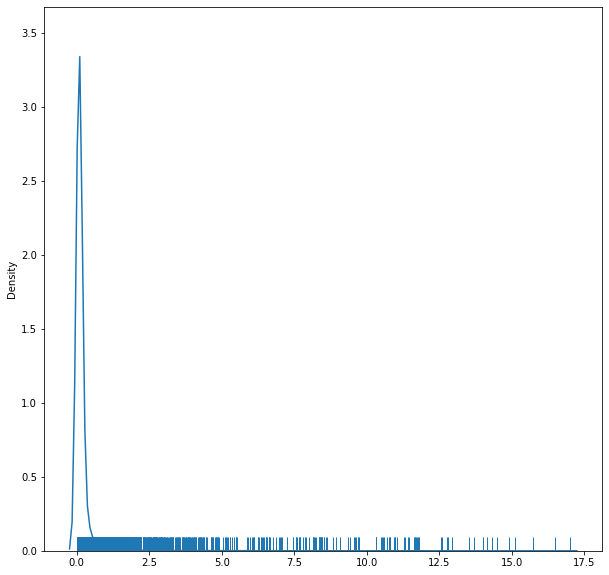

In [125]:
fig, ax = plt.subplots(figsize=chart_size)
sea.distplot(x=df_menores["MEN_GL"],kde=True,rug=True,hist=False)
plt.show()
fig.savefig('minorgrades.jpeg', transparent=None)

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


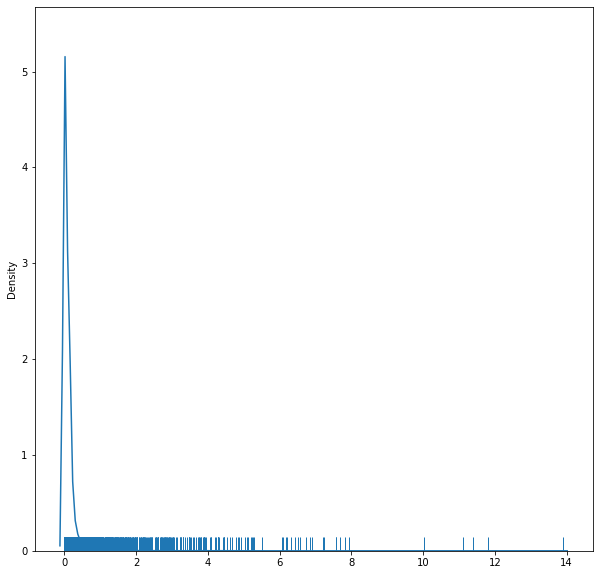

In [126]:
fig, ax = plt.subplots(figsize=chart_size)
sea.distplot(x=df_menores["MEN_1A"],kde=True,rug=True,hist=False)
plt.show()
fig.savefig('minorgrades_1A.jpeg', transparent=None)

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


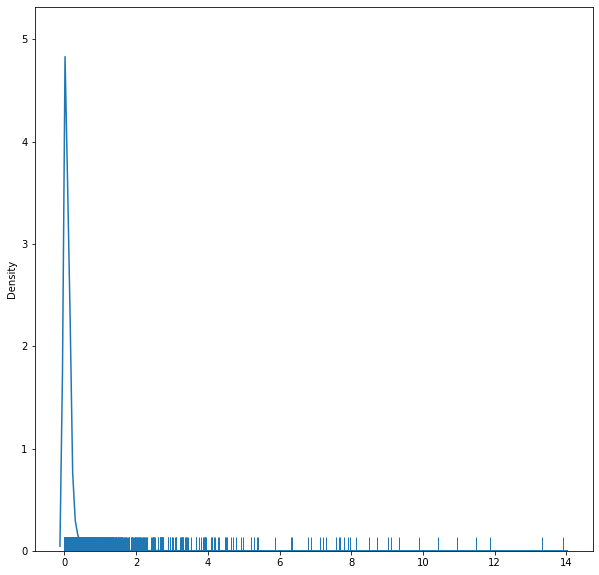

In [127]:
fig, ax = plt.subplots(figsize=chart_size)
sea.distplot(x=df_menores["MEN_1B"],kde=True,rug=True,hist=False)
plt.show()
fig.savefig('minorgrades_1B.jpeg', transparent=None)

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


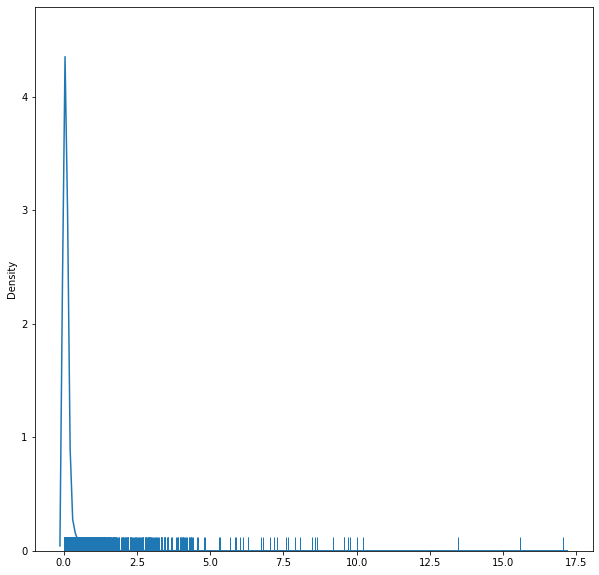

In [128]:
fig, ax = plt.subplots(figsize=chart_size)
sea.distplot(x=df_menores["MEN_2"],kde=True,rug=True,hist=False)
plt.show()
fig.savefig('minorgrades_2.jpeg', transparent=None)

In [129]:
basecol = ['FURO', 'NA', 'DE', 'ATE', 'COMP', 'CLV', 'CLI', 'INTEMP', 'ESTRAT']

In [130]:
massas = ['G1A', 'G1B', 'G2', 'G3']

In [131]:
todos =  basecol + maiores + massas

In [132]:
todos

['FURO',
 'NA',
 'DE',
 'ATE',
 'COMP',
 'CLV',
 'CLI',
 'INTEMP',
 'ESTRAT',
 'FEGL',
 'SIGL',
 'PGL',
 'ALGL',
 'MNGL',
 'PFGL',
 'G1A',
 'G1B',
 'G2',
 'G3']

In [133]:
df_orange = fso.loc[:,todos]

In [134]:
df_orange.head()

,FURO,NA,DE,ATE,COMP,CLV,CLI,INTEMP,ESTRAT,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,G1A,G1B,G2,G3
0,FSS-S11C-FD001,S11C-001-01,0.00,7.09,7.09,CM,CE,COB,FF,66.120,0.480,0.216,1.110,0.060,3.110,NaN,NaN,NaN,NaN
1,FSS-S11C-FD001,S11C-001-02,7.09,14.25,7.16,CM,CE,COB,FF,64.130,0.490,0.182,2.110,0.030,4.910,NaN,NaN,NaN,NaN
2,FSS-S11C-FD001,S11C-001-03,14.25,20.60,6.35,HF,HF,RD,FF,66.709,0.829,0.080,1.045,0.193,1.755,9.13,10.888,42.397,37.587
3,FSS-S11C-FD001,S11C-001-04,20.60,28.10,7.50,MD,MD,RD,FP,43.720,0.640,0.119,19.490,0.160,15.050,NaN,NaN,NaN,NaN
4,FSS-S11C-FD001,FSS-S11C-FD001-001NS,28.10,106.95,78.85,MD,MD,RD,FP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:

#DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, 
#index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', 
#line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', 
#errors='strict', storage_options=None)[source]


In [138]:
df_orange.to_csv('C:/DADOS/JP_NB/df_orange.csv',index=False)

In [139]:
fulldata = df_orange.dropna(how='any', subset=maiores+massas, inplace=True)

In [140]:
fso.head(2)

,FURO,NA,DE,ATE,COMP,CLV,CLI,INTEMP,ESTRAT,FEGL,SIGL,PGL,ALGL,MNGL,PFGL,TIGL,MGGL,CAGL,KGL,CUGL,G1,G1A,G1B,G2,G2A,G2B,G3,FE1,SI1,P1,AL1,MN1,PF1,TI1,MG1,CA1,K1,CU1,FE1A,SI1A,P1A,AL1A,MN1A,PF1A,TI1A,MG1A,CA1A,K1A,CU1A,FE1B,SI1B,P1B,AL1B,MN1B,PF1B,TI1B,MG1B,CA1B,K1B,CU1B,FE2,SI2,P2,AL2,MN2,PF2,TI2,MG2,CA2,K2,CU2,FE2A,SI2A,P2A,AL2A,MN2A,PF2A,TI2A,MG2A,CA2A,K2A,CU2A,FE2B,SI2B,P2B,AL2B,MN2B,PF2B,TI2B,MG2B,CA2B,K2B,CU2B,FE3,SI3,P3,AL3,MN3,PF3,TI3,MG3,CA3,K3,CU3,FGRA,FQGL,FQ1,FQ1A,FQ1B,FQ2,FQ2A,FQ2B,FQ3,REC_AM,FLX_AN,DA_ANQ,D_AGRU,MASS_T,STATUS,T_ENS,T_INF,MODELO
0,FSS-S11C-FD001,S11C-001-01,0.00,7.09,7.09,CM,CE,COB,FF,66.12,0.48,0.216,1.11,0.06,3.11,0.248,0.038,0.005,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPSS_OR||,NaN,NaN,NaN,NaN,NaN,DH,MOD_0808
1,FSS-S11C-FD001,S11C-001-02,7.09,14.25,7.16,CM,CE,COB,FF,64.13,0.49,0.182,2.11,0.03,4.91,0.356,0.034,0.002,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TPSS_OR||,NaN,NaN,NaN,NaN,NaN,DH,MOD_0808


### Get a brief overview of data structure: (rown and columns)

In [141]:
fso.shape

(33343, 122)

In [142]:
fso.dtypes

FURO       object
NA         object
DE        float64
ATE       float64
COMP      float64
CLV        object
CLI        object
INTEMP     object
ESTRAT     object
FEGL      float64
SIGL      float64
PGL       float64
ALGL      float64
MNGL      float64
PFGL      float64
TIGL      float64
MGGL      float64
CAGL      float64
KGL       float64
CUGL      float64
G1        float64
G1A       float64
G1B       float64
G2        float64
G2A       float64
G2B       float64
G3        float64
FE1       float64
SI1       float64
P1        float64
AL1       float64
MN1       float64
PF1       float64
TI1       float64
MG1       float64
CA1       float64
K1        float64
CU1       float64
FE1A      float64
SI1A      float64
P1A       float64
AL1A      float64
MN1A      float64
PF1A      float64
TI1A      float64
MG1A      float64
CA1A      float64
K1A       float64
CU1A      float64
FE1B      float64
SI1B      float64
P1B       float64
AL1B      float64
MN1B      float64
PF1B      float64
TI1B      

In [143]:
fso.columns

Index(['FURO', 'NA', 'DE', 'ATE', 'COMP', 'CLV', 'CLI', 'INTEMP', 'ESTRAT',
       'FEGL',
       ...
       'FQ3', 'REC_AM', 'FLX_AN', 'DA_ANQ', 'D_AGRU', 'MASS_T', 'STATUS',
       'T_ENS', 'T_INF', 'MODELO'],
      dtype='object', length=122)

In [146]:
df_gl = fso[["COMP","CLI","FEGL", "FEGLA","SIGL","G1"]]

KeyError: "['FEGLA'] not in index"

In [145]:
df_gl.columns

NameError: name 'df_gl' is not defined

In [ ]:
df_gl.head()


## Médias ponderadas por comprimento de amostra

In [ ]:
FEGL_AV=df_gl.groupby("CLI").apply(wavg, "FEGL", "COMP").to_frame()
FEGL_AV.rename(columns={0: 'FEGL'},inplace=True)

In [ ]:
FEGLA_AV=df_gl.groupby("CLI").apply(wavg, "FEGLA", "COMP").to_frame()
FEGLA_AV.rename(columns={0:'FEGLA'},inplace=True)

In [ ]:
pd.merge(FEGL_AV, FEGLA_AV, on='CLI', how='inner')

## configurando padrão de cores para litologias conforme definições da gerência


In [ ]:
litocolor=dict(AT= "#777777",CG= "#00AA00",HC = "#EE0000",HF = "#EE00DD",IAL = "#77AAFF",IC = "#004488", \
               IF = "#0088FF",IGO = "#7766DD", IMN = "#660099",IMNF = "#000000",IN = "#774400")

In [ ]:
df_gl2=df_gl.loc[:,:].dropna(how="all", inplace=True)

In [ ]:
df_gl.loc[:,"D_FEGL"]=df_gl.loc[:,"FEGLA"]-df_gl.loc[:,"FEGL"]

In [ ]:
df_gl.shape

In [ ]:
df_gl.shape

In [ ]:
df_gl.head()

In [137]:
df_gl.loc[:,"AD_FEGL"]=df_gl.loc[:,"D_FEGL"].abs()

NameError: name 'df_gl' is not defined

In [ ]:
df_gl.loc[:,"TEOR"]="teor"

In [ ]:
df_gl.loc[:,"ITAB"] = df_gl.apply(lambda row:trama_itab(row['FEGL'],row['SIGL']), axis=1)

In [ ]:
df_gl.head()

In [ ]:
df_gl.head()

In [ ]:
df_gl.head()

In [ ]:
#options: kernel density estimation (kde), binwidth and axis
#when you have different n for each class, try to normalize using distplot

In [ ]:
df_gl.drop(df_gl[df_gl.CLI == "\\N"].index,inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.histplot(data=df_gl["D_FEGL"],binwidth=0.5,kde=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.distplot(x=df_gl["D_FEGL"],kde=True,rug=True, hist=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI",multiple="stack", cumulative=True,palette=litocolor,alpha=.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI",fill=True, common_norm=False, palette=litocolor, alpha=.5, linewidth=0,)
fig.savefig('mean_grade_error_by_lito_fill.jpeg', transparent=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('meangrade_error_by_lito.jpeg', transparent=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="D_FEGL",hue="CLI", common_norm=False, cumulative=True,palette=litocolor, alpha=.5)
fig.savefig('meangrade_error_by_lito.jpeg', transparent=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.scatterplot(data=df_gl, x="FEGLA", y="FEGL", hue="CLI",palette=litocolor, size="AD_FEGL", alpha=1)
fig.savefig('mean_grade_fegl_scatter.jpeg', transparent=None)
plt.show()

## Verificando sensibilidade de erro em função do retido na primeira malha

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.scatterplot(data=df_gl, x="G1", y="AD_FEGL", hue="CLI",palette=litocolor)
fig.savefig('coarse_split_fegl_error.jpeg', transparent=None)
plt.show()

In [ ]:
df_gl[(df_gl['CLI'].isin(fresh_clean)) & (df_gl['FEGLA']>=0.01)].groupby(['CLI']).D_FEGL.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=10, figsize=(10,10), legend=True)

In [ ]:

sea.set_theme(style="whitegrid")

In [ ]:
delta=pd.melt(df_gl, "CLI", var_name="D_FEGL")
delta.head()

In [ ]:
# Show the conditional means


In [ ]:
fig, ax = plt.subplots(figsize=chart_size)

# Show the conditional means
#sea.pointplot(x="value", y="measurement", hue="species",
#              data=iris, dodge=.532, join=False, palette="dark",
#              markers="d", scale=.75, ci=None)


sea.stripplot(x="D_FEGL", y="TEOR",hue="CLI", data=df_gl, dodge=True, alpha=0.85, zorder=1, palette=litocolor )


#sea.pointplot(x="D_FEGL", y="TEOR", hue="CLI",
#              data=df_gl, dodge=0.5, join=False, palette=litocolor,
#              scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], labels[1:], title="CLI",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=4, frameon=True)

## ISOLANDO SISTEMA QUARTZO HEM

In [ ]:
df_gl.head()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl,x="ITAB",hue="CLI", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('sist_quartz_hem.jpeg', transparent=None)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=df_gl[df_gl["CLI"].isin(["IC","IF"])],x="ITAB",hue="CLI", common_norm=False, palette=litocolor, alpha=.5)
fig.savefig('sist_quartz_hem.jpeg', transparent=None)
plt.show()

In [ ]:
dffe = fso[["FEGL","FE1","FE2", "FE3","FE4", "FE5"]]

In [ ]:
dffe_valid=dffe.loc[0:,:].dropna(how="all", inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=chart_size)
sea.kdeplot(data=dffe_valid,x="FEGL",  alpha=.5)
fig.savefig('FE_SEGREG.jpeg', transparent=None)

In [ ]:
#import seaborn as sns
sea.set_theme(style="white")

# Load the example mpg dataset
mpg = sea.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sea.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)


mpg.head()

In [ ]:
sea.set_theme(style="whitegrid")
iris = sea.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sea.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sea.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sea.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

## Getting an Event Plot to Show Data Available

### Extract Subset From cli to g4:

In [ ]:
df_event = fso.loc[0:, 'cli':'g4']
df_event.shape

In [ ]:
df_event.head()

###### Creating vector for y axis ticks with grade names:


In [ ]:
ticks = np.arange(0, len(param_event)).tolist()
ticks


###### Creating color vector with randomized values

In [ ]:
mycolors = np.random.rand(len(param_event),3)
mycolors

###### Getting Data and Empty Cells for Plot:

In [ ]:
fig = plt.pyplot.figure(figsize=(20,20))  # sets the window to 8 x 6 inches
valid = []
for t in param_event:
    valid.append(df_event.index[pd.notna(df_event[t])])

plt.pyplot.eventplot(valid, color=mycolors, linelengths = 0.5, linewidth = 0.5)

plt.pyplot.title('EventPlot: padrão gráfico de disponibilidade de dados')
plt.pyplot.yticks(ticks, param_event)
plt.pyplot.xlabel('Registros do Banco de dados')
plt.pyplot.ylabel('Teores')
plt.pyplot.show()

fig.savefig('eventplot_data_avaiable.jpeg', transparent=None)

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 

plt.pyplot.title('Contagem de todos os dados não nulos no banco FSO')
fso.loc[:, ~fso.columns.isin(not_countable)].count().plot.bar(color='orange')
fig.savefig('teores_total_counts.jpeg', transparent=None)

In [ ]:
df_box = fso.loc[0:, 'cli':'g4']

In [ ]:
df_box2 = df_box[~df_box['cli'].isin(['AT', 'SR', 'VQ', 'DT', 'RO_L'])]

In [ ]:
df_box3 = df_box[df_box['cli'].isin(cover + str_ore)]

## Creating Boxplots for all Rocks:

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
feglbox = sea.boxplot(x="cli", y="fegl", data=df_box2)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_fegl.jpeg', transparent=None)

## Ore Boxplots

## Fegl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'fegl'
feglbox = sea.boxplot(x="cli", y=gr, data=df_box3)
feglbox.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### We missed the opportunity to better evaluate and manage our blends by omitting and diluting the compact itabirite above 50% Fegl. The blue sea down dip is the rabbit hole.

## Sigl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'sigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Pgl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### Before modeling, check if some extreme pgl values ​​are close to intrusive bodies (hydrothermal contribution?)

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
#setting yaxis to emphasize the box
box.set(ylim=(0, 0.3))
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_cl.jpeg', transparent=None)

## Algl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'algl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Mngl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### In some situations, the FMN shows manganese grades compatible with the Mn ores in our operations. If these bodies are regionalized and define modelable space, it doesn't take much volume to be compatible with the annual production of Mn. Base for comparison: 3Mwt / year @ 30% Mngl (CKS ROM)

##### Some samples can be located close to chemical traps (high PH + reductive/oxidative water levels), or even litostructural traps (dykes and other barriers)

In [ ]:
# result is a list, order is preserved
low_mn_rocks = [e for e in ore_rocks if e not in mn_rocks] 

df_box_low_mn = df_box[df_box['cli'].isin(low_mn_rocks)]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x="cli", y=gr, data=df_box_low_mn)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_low_mn.jpeg', transparent=None)

In [ ]:
# only high manganese
df_box_mn = df_box[df_box['cli'].isin(mn_rocks)]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x=gr, y="cli",data=df_box_mn)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_mn_rocks.jpeg', transparent=None)

## Pfgl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pfgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)


## Tigl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'tigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [ ]:
df_ti = df_box[df_box['cli'].isin(['AG','FL', 'IN', 'DO', 'IGO'])]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Mggl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Cagl

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### Standard plot is useless in this case... Spliting carbonatic rocks..


In [ ]:
df_box_sil  = df_box3[~df_box3['cli'].isin(carb_rocks)]
df_box_carb = df_box3[df_box3['cli'].isin(carb_rocks)]

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x="cli", y=gr, data=df_box_sil)
#setting yaxis to emphasize the box
box.set(ylim=(0, 2))
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x=gr, y="cli", data=df_box_carb)

box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G1

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g1'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G2

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g2'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G3

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g3'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G4

In [ ]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g4'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [ ]:

df_gl = fso.loc[0:, 'cli':'pfgl']

In [ ]:
df_gl.dropna(how='any').shape

In [ ]:
df_gl2 = df_gl[df_gl['cli'].isin(str_ore)].dropna(how='any')
df_gl2

In [ ]:
sea.pairplot(df_gl2, kind="scatter", hue="cli",  palette="Set2")
plt.pyplot.show()

In [ ]:
df_gl3 = df_gl2[df_gl2['cli'].isin(basin_rock)]

In [ ]:
df_gl3.head()

In [ ]:
sea.pairplot(df_gl3, kind="scatter", hue="cli",  palette="Set2")
plt.pyplot.show()

In [ ]:
cac.groupby(['geocod'])['fegl'].describe()


In [ ]:
cac[cac['compid']=='10M_FLP'].hist(by='geocod', column='fegl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

In [ ]:
# EXAMPLE: filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

In [ ]:
cac[(cac['geocod'].isin(fresh_clean)) & (cac['compid']=='10M_FLP')].groupby(['geocod']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True)

In [ ]:
cac[(cac['geocod'].isin(fresh_clean)) & (cac['compid']=='10M_FLP')].groupby(['geocod']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True, density=True)

In [ ]:
sea.set_theme()

In [ ]:
penguins=sea.load_dataset("penguins")

In [ ]:
g=sea.PairGrid(penguins,hue="species",corner=True)
g.map_lower(sea.kdeplot,hue=None,levels=5,color=".2")
g.map_lower(sea.scatterplot,marker="+")
g.map_diag(sea.histplot,element="step",linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

In [ ]:
print(sea.__version__)

In [ ]:
g = sea.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sea.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sea.scatterplot, marker="+")
g.map_diag(sea.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))